In [1]:
import pandas as pd    #importing necessary libraries
import numpy as np

In [2]:
data = pd.read_csv('/Users/apple/Documents/GitHub/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/Datasets/DataFrame.csv')      #Reading csv file and creating DataFrame
print(data.shape)
data.head()

(22805, 8)


,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [3]:
data.drop('Unnamed: 7' , axis = 1 , inplace = True)   #Dropping unnecessary Column:-> Unnamed: 7

In [4]:
data.rename(columns = str.upper , inplace = True)

In [5]:
data

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05


# CONVERTING STRING INTO DATE TIME SERIES

In [6]:
import datetime
data['DATE'] = pd.to_datetime(data['DATE'] , format = "%Y%m%d")

In [7]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


<AxesSubplot:>

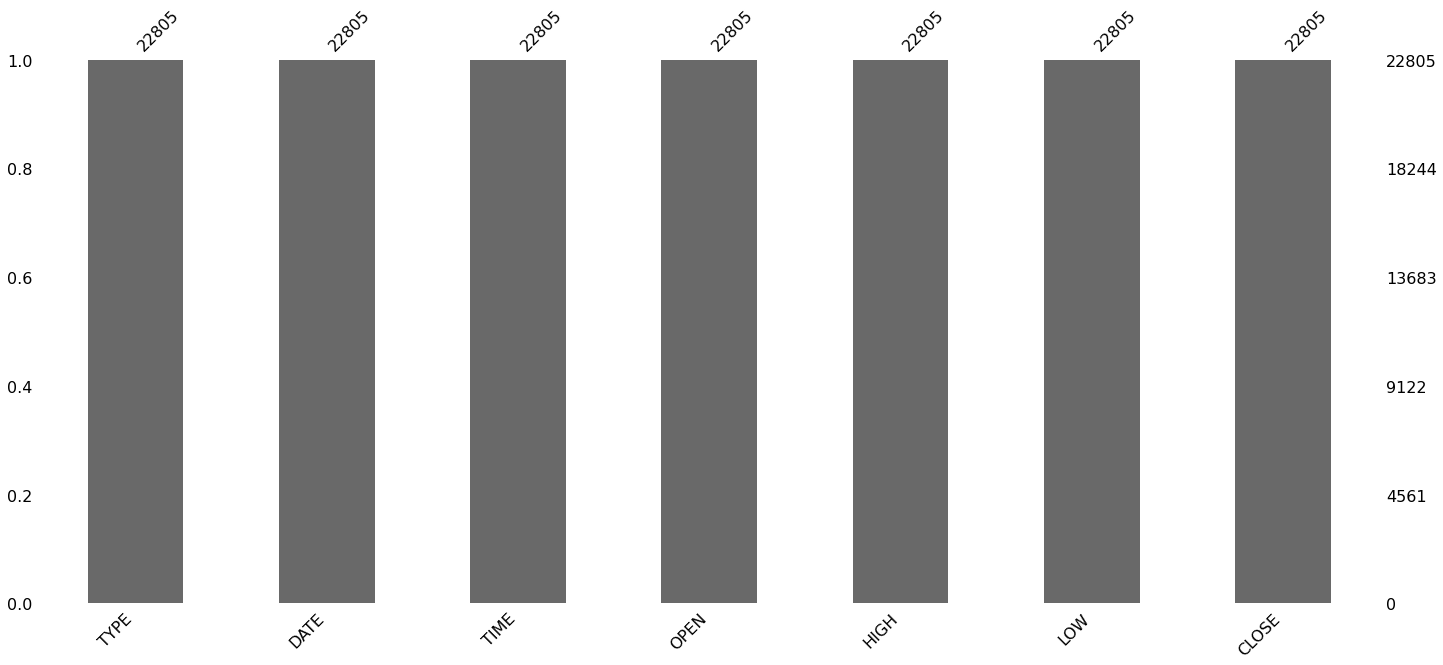

In [8]:
import missingno as msno       #Checking for the missing entries
msno.bar(data)

In [9]:
data.describe()   #Statistics of the Dataset

,OPEN,HIGH,LOW,CLOSE
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TYPE    22805 non-null  object        
 1   DATE    22805 non-null  datetime64[ns]
 2   TIME    22805 non-null  object        
 3   OPEN    22805 non-null  float64       
 4   HIGH    22805 non-null  float64       
 5   LOW     22805 non-null  float64       
 6   CLOSE   22805 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.2+ MB


In [11]:
data[data.duplicated()]       #Checking for the duplicated entries

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE


# CONSIDERING ANOTHER DATASET

In [12]:
df2 = pd.read_csv('/Users/apple/Documents/GitHub/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/Datasets/MSFT.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [13]:
df2.rename(columns = str.upper , inplace = True)

In [14]:
df2['DATE'] = pd.to_datetime(df2['DATE'] , format = "%Y-%m-%d")

In [15]:
df2.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [16]:
df2[df2.duplicated()]

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME


In [17]:
df2.describe()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [18]:
df2.isna().sum()

DATE         0
OPEN         0
HIGH         0
LOW          0
CLOSE        0
ADJ CLOSE    0
VOLUME       0
dtype: int64

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       8857 non-null   datetime64[ns]
 1   OPEN       8857 non-null   float64       
 2   HIGH       8857 non-null   float64       
 3   LOW        8857 non-null   float64       
 4   CLOSE      8857 non-null   float64       
 5   ADJ CLOSE  8857 non-null   float64       
 6   VOLUME     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [20]:
#df2.value_counts()

# EDA ANALYSIS (DataFrame.csv)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
d1 = data.copy()
d1

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,2021-03-31,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,2021-03-31,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,2021-03-31,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,2021-03-31,15:30,14689.85,14693.55,14689.45,14693.05


In [23]:
d1.columns
d1 = d1.set_index(['TYPE','DATE','TIME'])

In [24]:
feature = ['OPEN', 'HIGH', 'LOW', 'CLOSE']

In [25]:
list(enumerate(feature))

[(0, 'OPEN'), (1, 'HIGH'), (2, 'LOW'), (3, 'CLOSE')]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


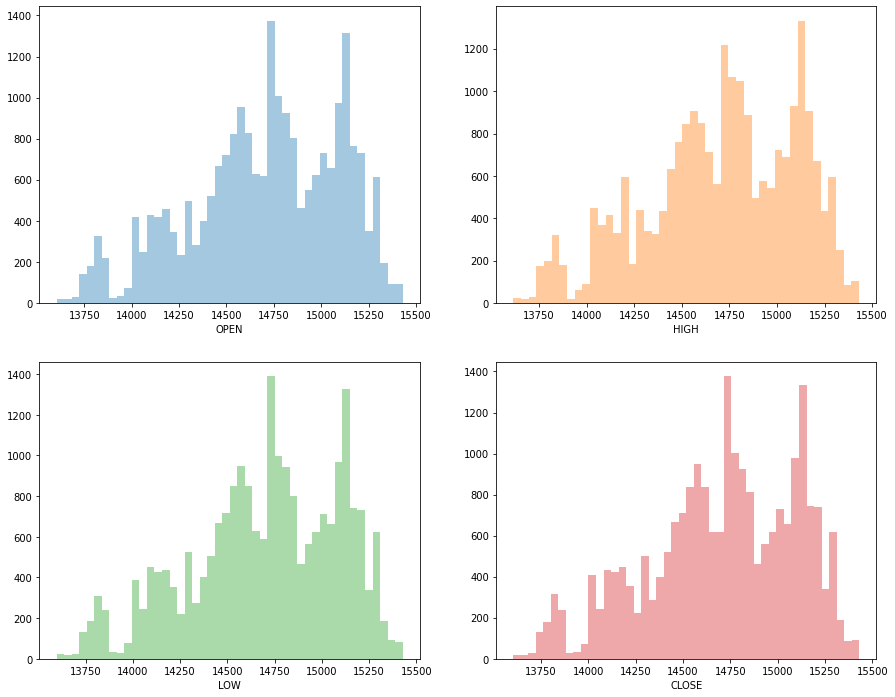

In [26]:
plt.figure(figsize=(15,12))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(x = d1[i[1]] , kde = False , color = base_color)
    plt.xlabel(i[1]);

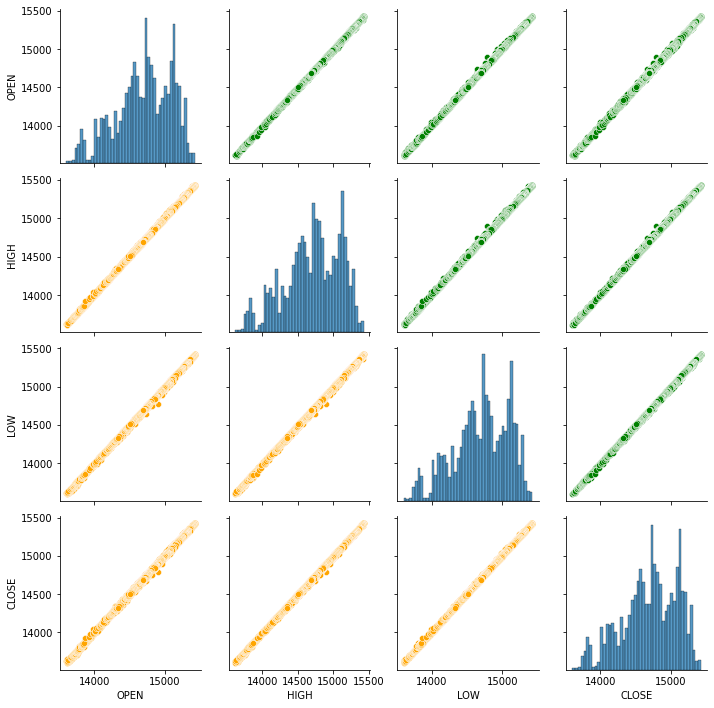

In [27]:
color = sns.PairGrid(d1)
color.map_upper(sns.scatterplot,color = 'green')
color.map_lower(sns.scatterplot,color = 'orange')
color.map_diag(sns.histplot)

Text(0.5, 0, 'DATE')

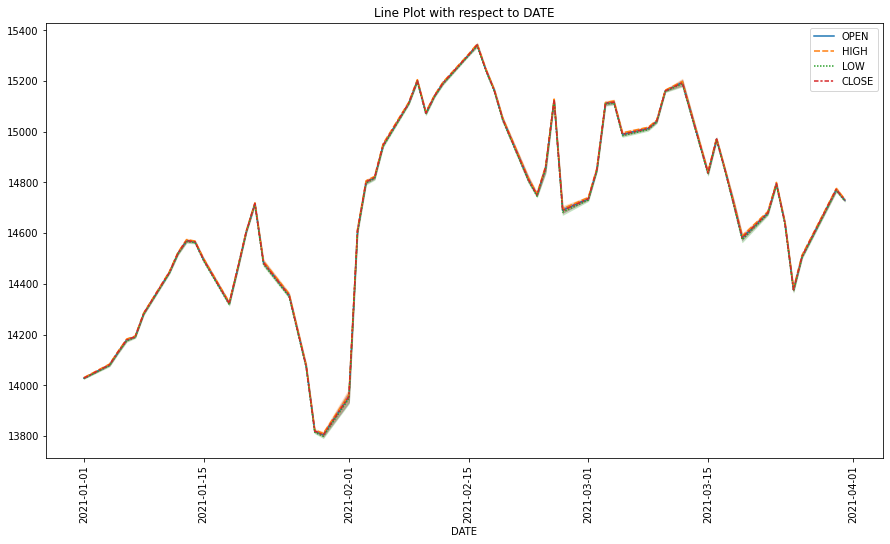

In [28]:
d1 = d1.reset_index()                  # line plot w.r.t DATE
d1 = d1.set_index('DATE')
plt.figure(figsize=(15,8))
sns.lineplot(data = d1)
plt.xticks(rotation = 90)
plt.title('Line Plot with respect to DATE')
plt.xlabel("DATE")


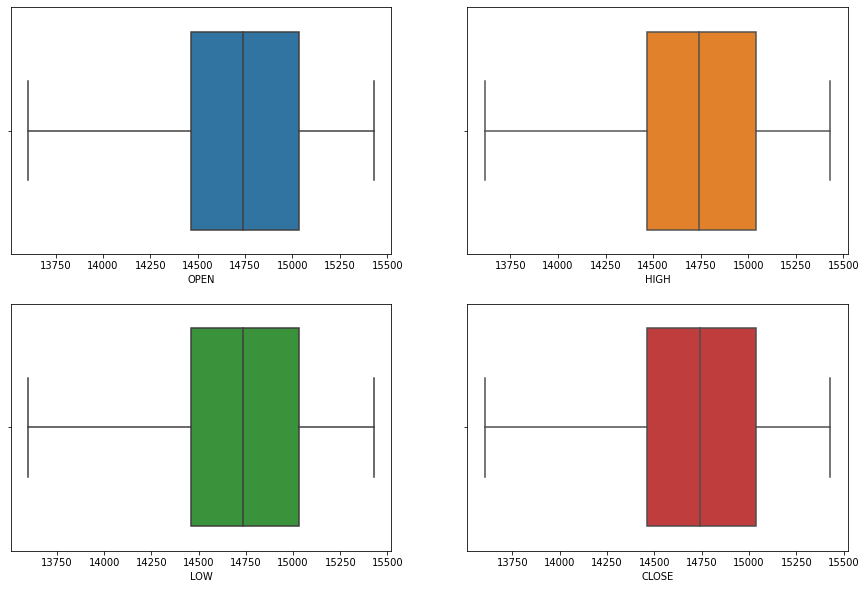

In [29]:
plt.figure(figsize=(15,10))         #creating Box plots of various attributes
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d1[i[1]] , color = base_color)
    plt.xlabel(i[1]);

<AxesSubplot:>

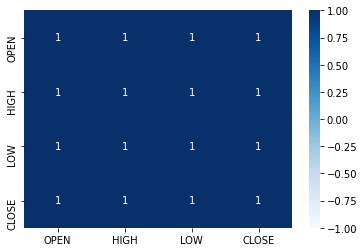

In [30]:
sns.heatmap(d1.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Blues')     #heat map to determine correlation

# EDA ANALYSIS (MSFT.csv)

In [31]:
d2 = df2.copy()
d2

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [32]:
d2 = d2.set_index(['DATE'])

In [33]:
feat = d2.columns

In [34]:
list(enumerate(feat))

[(0, 'OPEN'),
 (1, 'HIGH'),
 (2, 'LOW'),
 (3, 'CLOSE'),
 (4, 'ADJ CLOSE'),
 (5, 'VOLUME')]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

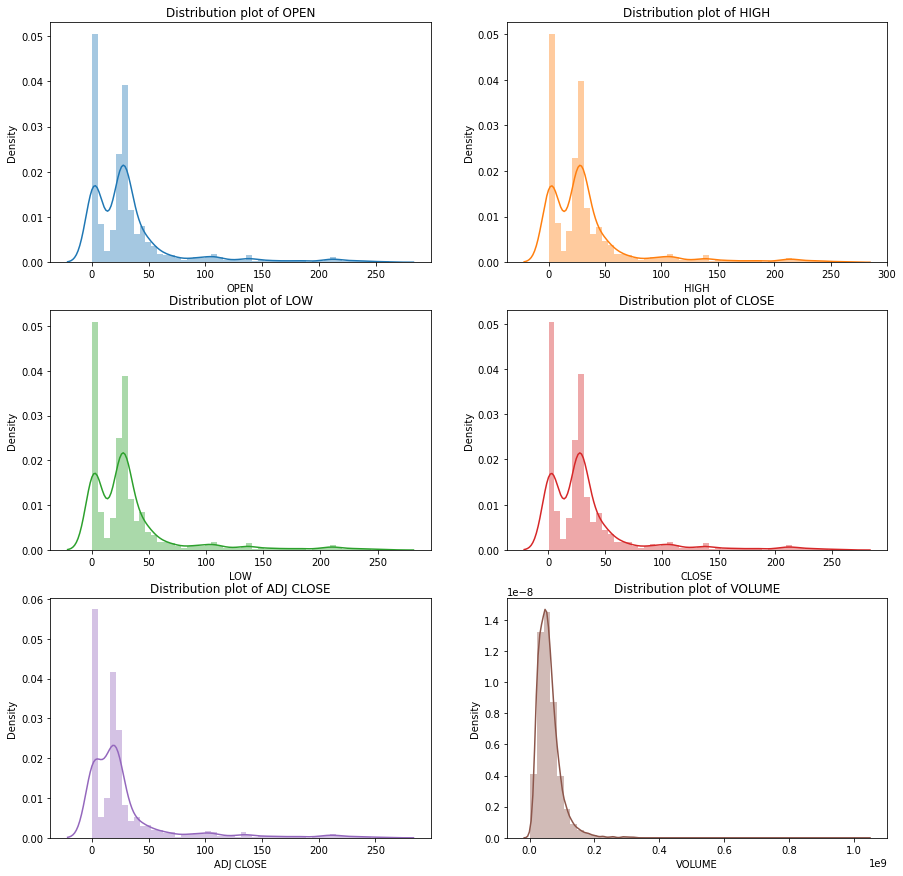

In [35]:
plt.figure(figsize=(15,15))         #creating distribution plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Distribution plot of {i[1]}')

<AxesSubplot:xlabel='DATE'>

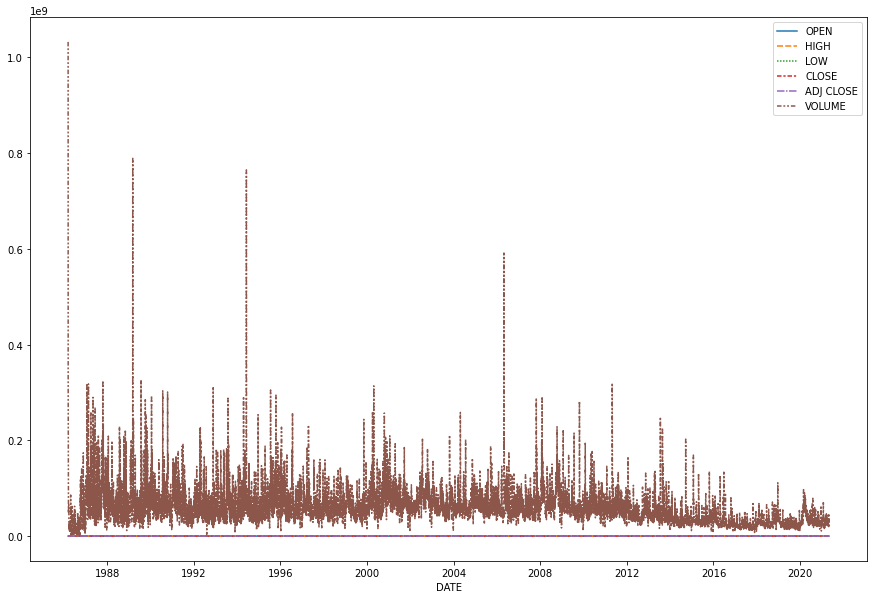

In [36]:
plt.figure(figsize=(15,10))    #plot of line plot btwn Date and various other attributes
sns.lineplot(data = d2)

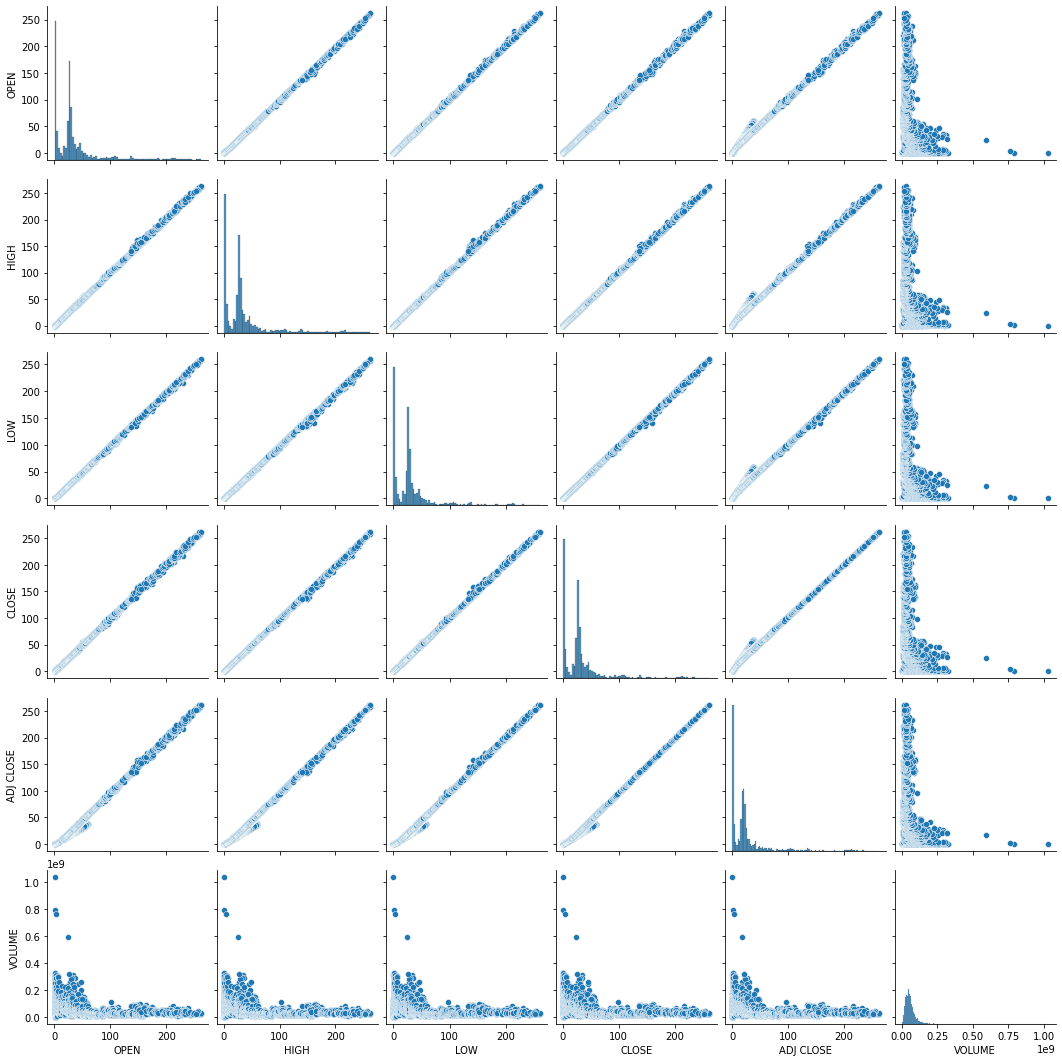

In [37]:
sns.pairplot(data = d2)      #Plots b/w various attributes

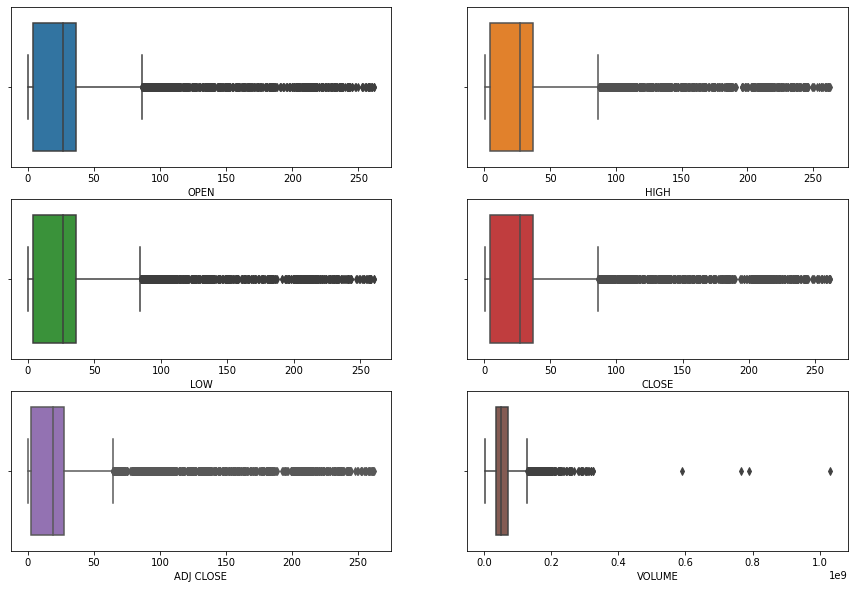

In [38]:
plt.figure(figsize=(15,10))         #creating Box plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

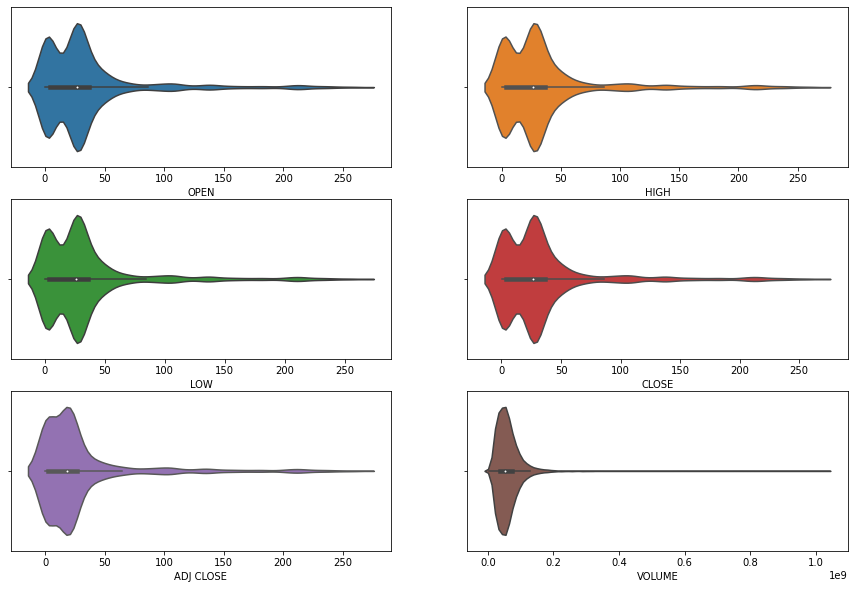

In [39]:
plt.figure(figsize=(15,10))         #creating Violin plots of various attributes
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.violinplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

<AxesSubplot:>

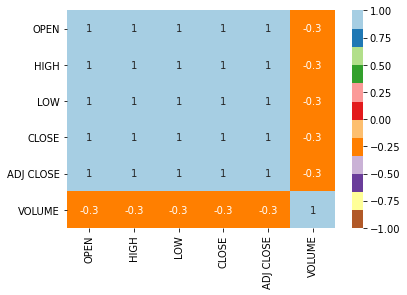

In [40]:
sns.heatmap(d2.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Paired_r')     #heat map to determine correlation

# AS SEEN THE PRESENCE OF OUTLIERS IN MSFT, SO SUPRESSING THEIR EFFECT

In [41]:
iqr1 = d2['OPEN'].quantile(0.75) - d2['OPEN'].quantile(0.25) 
iqr1

32.88624954223633

In [42]:
upper_whisker = d2['OPEN'].quantile(0.75)+(iqr1*1.5)
lower_whisker = d2['OPEN'].quantile(0.25)-(iqr1*1.5)
print(upper_whisker)
print(lower_whisker)

86.05937385559082
-45.48562431335449


In [43]:
iqr2 = d2['CLOSE'].quantile(0.75) - d2['CLOSE'].quantile(0.25) 
iqr2

32.80843687057495

In [44]:
upper_whisker = d2['CLOSE'].quantile(0.75)+(iqr2*1.5)
lower_whisker = d2['CLOSE'].quantile(0.25)-(iqr2*1.5)
print(upper_whisker)
print(lower_whisker)

85.87265515327454
-45.36109232902527


In [45]:
iqr3 = d2['HIGH'].quantile(0.75) - d2['HIGH'].quantile(0.25) 
iqr3

33.125

In [46]:
upper_whisker = d2['HIGH'].quantile(0.75)+(iqr3*1.5)
lower_whisker = d2['HIGH'].quantile(0.25)-(iqr3*1.5)
print(upper_whisker)
print(lower_whisker)

86.6875
-45.8125


In [47]:
iqr4 = d2['LOW'].quantile(0.75) - d2['LOW'].quantile(0.25) 
iqr4

32.29750061035156

In [48]:
upper_whisker = d2['LOW'].quantile(0.75)+(iqr4*1.5)
lower_whisker = d2['LOW'].quantile(0.25)-(iqr4*1.5)
print(upper_whisker)
print(lower_whisker)

84.5562515258789
-44.633750915527344


In [49]:
iqr5 = d2['ADJ CLOSE'].quantile(0.75) - d2['ADJ CLOSE'].quantile(0.25) 
iqr5

24.771977186203003

In [50]:
upper_whisker = d2['ADJ CLOSE'].quantile(0.75)+(iqr5*1.5)
lower_whisker = d2['ADJ CLOSE'].quantile(0.25)-(iqr5*1.5)
print(upper_whisker)
print(lower_whisker)

64.37626564502716
-34.71164309978485


In [51]:
iqr6 = d2['VOLUME'].quantile(0.75) - d2['VOLUME'].quantile(0.25) 
iqr6

37798000.0

In [52]:
upper_whisker = d2['VOLUME'].quantile(0.75)+(iqr6*1.5)
lower_whisker = d2['VOLUME'].quantile(0.25)-(iqr6*1.5)
print(upper_whisker)
print(lower_whisker)

130092200.0
-21099800.0


In [53]:
d2.loc[d2['OPEN'] >= 86.05937385559082 , 'OPEN'] = 86.05937385559082
d2.loc[d2['CLOSE'] >= 85.87265515327454 , 'CLOSE'] = 85.87265515327454
d2.loc[d2['HIGH'] >= 86.6875 , 'HIGH'] = 86.6875
d2.loc[d2['LOW'] >= 84.5562515258789 , 'LOW'] = 84.5562515258789
d2.loc[d2['ADJ CLOSE'] >= 64.37626564502716 , 'ADJ CLOSE'] = 64.37626564502716
d2.loc[d2['VOLUME'] >= 130092200.0 , 'VOLUME'] = 130092200.0

In [54]:
d2

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
DATE,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,130092200.0
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,130092200.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,130092200.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400.0
...,...,...,...,...,...,...
2021-04-27,86.059374,86.687500,84.556252,85.872655,64.376266,31014200.0
2021-04-28,86.059374,86.687500,84.556252,85.872655,64.376266,46903100.0
2021-04-29,86.059374,86.687500,84.556252,85.872655,64.376266,40589000.0


In [55]:
d2.describe()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,28.668768,28.957282,28.299462,28.656075,21.736316,5.753293e+07
std,25.343716,25.530864,24.964792,25.305929,20.154263,2.896535e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,86.059374,86.687500,84.556252,85.872655,64.376266,1.300922e+08


In [56]:
l = ['OPEN' , 'HIGH' , 'LOW' , 'CLOSE' , 'ADJ CLOSE' , 'VOLUME']
list(enumerate(l))

[(0, 'OPEN'),
 (1, 'HIGH'),
 (2, 'LOW'),
 (3, 'CLOSE'),
 (4, 'ADJ CLOSE'),
 (5, 'VOLUME')]

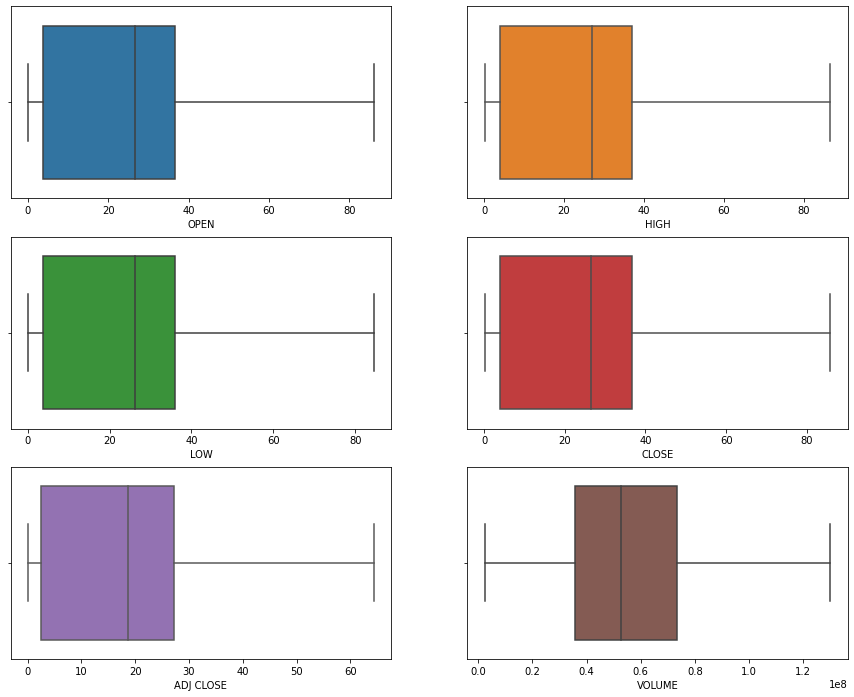

In [57]:
plt.figure(figsize=(15,12))#creating Box plots of various columns after removing outliers
for i in enumerate(l):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = d2[i[1]] , color = base_color)
    plt.xlabel(i[1]);

# Dataframe.csv

In [58]:
data['TYPE'].value_counts()

NIFTY    22805
Name: TYPE, dtype: int64

In [59]:
data.drop(['TYPE'],axis=1,inplace=True)

In [60]:
data.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [61]:
data['DAY']=pd.to_datetime(data.DATE, format="%Y/%m/%d").dt.day
data['MONTH']=pd.to_datetime(data['DATE'], format='%Y/%m/%d').dt.month
data['YEAR']=pd.to_datetime(data['DATE'], format='%Y/%m/%d').dt.year

In [62]:
data['HOUR']=pd.to_datetime(data['TIME']).dt.hour
data['MINUTE']=pd.to_datetime(data['TIME']).dt.minute

In [63]:
data.drop(['DATE'],axis=1,inplace=True)
data.drop(['TIME'],axis=1,inplace=True)
data.head()

,OPEN,HIGH,LOW,CLOSE,DAY,MONTH,YEAR,HOUR,MINUTE
0,13997.90,14020.85,13991.35,14013.15,1,1,2021,9,16
1,14014.85,14018.55,14008.15,14009.05,1,1,2021,9,17
2,14008.05,14013.10,14005.05,14012.70,1,1,2021,9,18
3,14013.65,14019.10,14013.65,14016.20,1,1,2021,9,19
4,14015.45,14017.80,14011.95,14015.45,1,1,2021,9,20


In [64]:
X=data.loc[:,data.columns!='CLOSE']
y=data['CLOSE']

In [65]:
X

,OPEN,HIGH,LOW,DAY,MONTH,YEAR,HOUR,MINUTE
0,13997.90,14020.85,13991.35,1,1,2021,9,16
1,14014.85,14018.55,14008.15,1,1,2021,9,17
2,14008.05,14013.10,14005.05,1,1,2021,9,18
3,14013.65,14019.10,14013.65,1,1,2021,9,19
4,14015.45,14017.80,14011.95,1,1,2021,9,20
...,...,...,...,...,...,...,...,...
22800,14687.35,14694.35,14686.30,31,3,2021,15,27
22801,14690.90,14690.90,14686.05,31,3,2021,15,28
22802,14690.30,14694.10,14688.55,31,3,2021,15,29
22803,14689.85,14693.55,14689.45,31,3,2021,15,30


In [66]:
y

0        14013.15
1        14009.05
2        14012.70
3        14016.20
4        14015.45
           ...   
22800    14690.60
22801    14689.30
22802    14691.30
22803    14693.05
22804    14690.70
Name: CLOSE, Length: 22805, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(18244, 8) (4561, 8) (18244,) (4561,)


In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
sc= MinMaxScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
X_train_std

array([[0.82814084, 0.8261722 , 0.82395853, ..., 0.        , 0.5       ,
        0.94915254],
       [0.8404987 , 0.84384492, 0.8408798 , ..., 0.        , 0.125     ,
        0.06779661],
       [0.1270311 , 0.13572099, 0.11104407, ..., 0.        , 0.        ,
        0.27118644],
       ...,
       [0.85987122, 0.86455514, 0.86062584, ..., 0.        , 0.        ,
        0.6440678 ],
       [0.83296342, 0.83075606, 0.82925157, ..., 0.        , 0.375     ,
        0.94915254],
       [0.47990136, 0.47644557, 0.48010312, ..., 0.        , 0.125     ,
        0.74576271]])

In [72]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree= 3,C = 100, coef0=1)

In [73]:
svr.fit(X_train_std,y_train)

SVR(C=100, coef0=1, kernel='poly')

In [74]:
y_train_pred=svr.predict(X_train_std)
y_test_pred=svr.predict(X_test_std)

In [75]:
y_train_pred

array([15107.99585993, 15146.48713102, 13837.56050947, ...,
       15184.37493824, 15117.43995033, 14482.15112199])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
mean_squared_error(y_test,y_test_pred)

7.539355666216515

In [78]:
r2_score(y_train,y_train_pred)

0.9999505914890244

In [79]:
r2_score(y_test,y_test_pred)

0.999951840410929

# MSFT.csv

In [80]:
df2['DAY']=pd.to_datetime(df2.DATE, format="%Y/%m/%d").dt.day
df2['MONTH']=pd.to_datetime(df2['DATE'], format='%Y/%m/%d').dt.month
df2['YEAR']=pd.to_datetime(df2['DATE'], format='%Y/%m/%d').dt.year

In [81]:
df2.drop(['DATE'],axis=1,inplace=True)
df2.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,DAY,MONTH,YEAR
0,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986


In [82]:
X1=df2.loc[:,df2.columns!='CLOSE']
y1=df2['CLOSE']

In [83]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [84]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(7085, 8) (1772, 8) (7085,) (1772,)


In [85]:
sc= MinMaxScaler()
X1_train_std=sc.fit_transform(X1_train)
X1_test_std=sc.transform(X1_test)
X1_train_std

array([[0.11636001, 0.11584272, 0.11543098, ..., 0.7       , 0.18181818,
        0.45714286],
       [0.17468537, 0.17449007, 0.16294974, ..., 0.1       , 0.27272727,
        0.4       ],
       [0.09615521, 0.0968764 , 0.09636003, ..., 0.46666667, 0.63636364,
        0.71428571],
       ...,
       [0.09676689, 0.09623025, 0.09620623, ..., 0.46666667, 0.45454545,
        0.54285714],
       [0.15246391, 0.15584207, 0.15213582, ..., 0.3       , 0.09090909,
        0.37142857],
       [0.03980349, 0.03967813, 0.0393106 , ..., 1.        , 1.        ,
        0.28571429]])

In [86]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree= 3,C = 100, coef0=1)

In [87]:
svr.fit(X1_train_std,y1_train)

SVR(C=100, coef0=1, kernel='poly')

In [88]:
y1_train_pred=svr.predict(X1_train_std)
y1_test_pred=svr.predict(X1_test_std)

In [89]:
y1_train_pred

array([30.15550511, 43.95175849, 25.4314358 , ..., 25.37704905,
       40.51391599, 10.28629258])

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
mean_squared_error(y1_test,y1_test_pred)

0.03093323644886096

In [92]:
r2_score(y1_train,y1_train_pred)

0.9999848281110565

In [93]:
r2_score(y1_test,y1_test_pred)

0.9999824226640665

# MSFT (Outliers removed)

In [94]:
d2.reset_index(inplace=True)

In [95]:
d2

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,130092200.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,130092200.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,130092200.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400.0
...,...,...,...,...,...,...,...
8852,2021-04-27,86.059374,86.687500,84.556252,85.872655,64.376266,31014200.0
8853,2021-04-28,86.059374,86.687500,84.556252,85.872655,64.376266,46903100.0
8854,2021-04-29,86.059374,86.687500,84.556252,85.872655,64.376266,40589000.0
8855,2021-04-30,86.059374,86.687500,84.556252,85.872655,64.376266,30929200.0


In [96]:
d2['DAY']=pd.to_datetime(d2['DATE'], format="%Y/%m/%d").dt.day
d2['MONTH']=pd.to_datetime(d2['DATE'], format='%Y/%m/%d').dt.month
d2['YEAR']=pd.to_datetime(d2['DATE'], format='%Y/%m/%d').dt.year

In [97]:
d2.drop(['DATE'],axis=1,inplace=True)
d2.head()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,DAY,MONTH,YEAR
0,0.088542,0.101563,0.088542,0.097222,0.061751,130092200.0,13,3,1986
1,0.097222,0.102431,0.097222,0.100694,0.063956,130092200.0,14,3,1986
2,0.100694,0.103299,0.100694,0.102431,0.065059,130092200.0,17,3,1986
3,0.102431,0.103299,0.098958,0.099826,0.063405,67766400.0,18,3,1986
4,0.099826,0.100694,0.097222,0.098090,0.062302,47894400.0,19,3,1986


In [98]:
X2=d2.loc[:,d2.columns!='CLOSE']
y2=d2['CLOSE']

In [99]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [100]:
print(X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape)

(7085, 8) (1772, 8) (7085,) (1772,)


In [101]:
sc= MinMaxScaler()
X2_train_std=sc.fit_transform(X2_train)
X2_test_std=sc.transform(X2_test)
X2_train_std

array([[0.35403237, 0.35195813, 0.35541935, ..., 0.7       , 0.18181818,
        0.45714286],
       [0.53149082, 0.53014295, 0.50173265, ..., 0.1       , 0.27272727,
        0.4       ],
       [0.29255804, 0.29433389, 0.29669868, ..., 0.46666667, 0.63636364,
        0.71428571],
       ...,
       [0.29441913, 0.29237073, 0.29622513, ..., 0.46666667, 0.45454545,
        0.54285714],
       [0.46388068, 0.47348584, 0.46843591, ..., 0.3       , 0.09090909,
        0.37142857],
       [0.12110454, 0.12055173, 0.12103984, ..., 1.        , 1.        ,
        0.28571429]])

In [102]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree= 3,C = 100, coef0=1)

In [103]:
svr.fit(X2_train_std,y2_train)

SVR(C=100, coef0=1, kernel='poly')

In [104]:
y2_train_pred=svr.predict(X2_train_std)
y2_test_pred=svr.predict(X2_test_std)

In [105]:
y2_train_pred

array([30.18265197, 43.21813585, 25.46172354, ..., 25.23592495,
       40.63493946, 10.30817247])

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
mean_squared_error(y2_test,y2_test_pred)

0.02858113779207589

In [108]:
r2_score(y2_train,y2_train_pred)

0.9999568182516501

In [109]:
r2_score(y2_test,y2_test_pred)

0.9999543827104229

We can see that, we obtain a lower mean squared error when outliers are suppressed in the MSFT data.